# Recognizing digits using a perceptron

MNIST dataset is a large collection of handwritten digits used for training various image processing systems. This dataset is composed of 60,000 training images and 10,000 testing images.

Before proceeding further with the model, let's load all the necessary packages.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import random

We will create a model that will recognize two digits of our choice. So let's choose the digits that we will further classify.

We can choose digits randomly, or we can predetermine which digits we want our model to recognize. 

In [13]:
digits = random.sample(range(10), 2)
digit_a, digit_b = digits

print("First digit:", digit_a)
print("Second digit:", digit_b)


First digit: 2
Second digit: 9


Now Let's load the data, and split it into a training set and a test set.

In [14]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Let's look at what the data structure looks like.

In [19]:
print(" Train data X :\n",train_X[0],"\nTrain data Y :",train_y[0],"\nShape X :",train_X.shape,"\nShape Y :",train_y.shape)

 Train data X :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

We can also look at our data in a different way.

Element label : 5


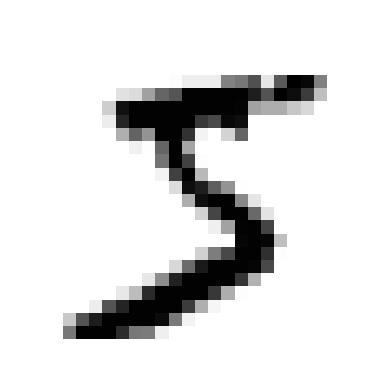

In [21]:
print("Element label :",train_y[0])
image=train_X[0]
plt.imshow(255-image, cmap='gray')
plt.axis('off')
plt.show()

Since our data refers to the digits from 0 to 9 we will want to filter them so that only the ones we selected remain.

In [22]:
filtered_train_X = train_X[(train_y == digit_a) | (train_y == digit_b)]
filtered_train_y = train_y[(train_y == digit_a) | (train_y == digit_b)]
filtered_test_X = test_X[(test_y == digit_a) | (test_y == digit_b)]
filtered_test_y = test_y[(test_y == digit_a) | (test_y == digit_b)]

In [27]:
print("Train data shape :",filtered_train_X.shape,"\nTest data shape :", filtered_test_X.shape)

Train data shape : (11907, 28, 28) 
Test data shape : (2041, 28, 28)


We will now encode the selected digits as:

In [28]:
print("Digit",digit_a,"as", 0,"\nDigit",digit_b,"as", 1)

Digit 2 as 0 
Digit 9 as 1


In [29]:
filtered_train_y = np.where(filtered_train_y == digit_a, 0, 1)
filtered_test_y = np.where(filtered_test_y == digit_a, 0, 1)

Now we need to flatten each 28 by 28 size matrix to a vector of length 28 times 28.

In [31]:
flat_train_X = filtered_train_X.reshape(filtered_train_X.shape[0], -1)
flat_test_X = filtered_test_X.reshape(filtered_test_X.shape[0], -1)

print("X train shape after flatten :",flat_train_X.shape,"\nX test shape after flatten", flat_test_X.shape)

X train shape after flatten : (11907, 784) 
X test shape after flatten (2041, 784)


We have re-arranged the data so that the perceptron can learn from it to classify the image into categories 0 or 1.

Now let's define the perceptron class itself.

In [65]:
class Perceptron:
    def __init__(self, n):
        self.w = np.random.rand(n + 1)

    def predict(self, x):
        activation = np.dot(self.w, x)
        return 1 if activation >= 0 else 0

    def train(self, xx, d, eta, tol, max_iterations=1000):
        xx = np.array([np.append([1], x) for x in xx])
        for _ in range(max_iterations):
            error_count = 0
            for x, desired in zip(xx, d):
                prediction = self.predict(x)
                error = desired - prediction
                error_count += abs(error)
                self.w += eta * error * x
            if error_count/len(xx) <= tol:
                break

    def evaluate_test(self, xx, d):
      xx = np.array([np.append([1], x) for x in xx])
      TP, FP, TN, FN = 0, 0, 0, 0
      predictions = []
      for x, desired in zip(xx, d):
          prediction = self.predict(x)
          predictions.append(prediction)
          if prediction == 1 and desired == 1:
              TP += 1
          elif prediction == 1 and desired == 0:
              FP += 1
          elif prediction == 0 and desired == 1:
              FN += 1
          elif prediction == 0 and desired == 0:
              TN += 1
      error_rate = (FP + FN) / len(xx)
      confusion_matrix = np.array([[TP, FP], [FN, TN]])
      return error_rate, predictions, confusion_matrix

    def classify(self, x):
        x = np.append([1], x)
        return self.predict(x)

    def decode(self,x, digit_a,digit_b):
      if x == 0:
        return digit_a
      else:
        return digit_b



Let's initialize the perceptron with random weights.

In [34]:
perceptron = Perceptron(n=flat_train_X.shape[1])

Now let's train our perceptron on the training data. By default, we will set the learning rate $η = 0.01$, and the error tolerance $tol = 0.01$.

In [35]:
perceptron.train(flat_train_X, filtered_train_y, eta=0.01, tol=0.01)

**Teraz ocenimy perceptron na zbiorze testowym:**

In [40]:
test_error_rate, test_predictions, confusion_matrix = perceptron.evaluate_test(flat_test_X, filtered_test_y)

print("Error rate on test data :" ,test_error_rate,"\nAccuracy :",1-test_error_rate,"\nConfusion matrix:\n",confusion_matrix)

Error rate on test data : 0.014208721215090642 
Accuracy : 0.9857912787849094 
Confusion matrix:
 [[ 998   18]
 [  11 1014]]


We received satisfactory performance.

Algorithm predicted:

In [46]:
print("Correctly", digit_b, ":",confusion_matrix[0][0],"| Correctly", digit_a, ":",confusion_matrix[1][1],"| Incorrectly",digit_b,":",confusion_matrix[1][0],"| Incorrectly",digit_a,":",confusion_matrix[0][1])

Correctly 9 : 998 | Correctly 2 : 1014 | Incorrectly 9 : 11 | Incorrectly 2 : 18


Now we will teach the model to recognize another pair of digits, and then check the operation of the algorithm on the digits that the user will write by hand.

I handwrote the numbers 2, and 8 in Paint, and then saved them in a format from which I can switch to a 28 by 28 matrix. Now I will save them as matrices, and display what the numbers I wrote look like.

In [47]:
MyNumber2 = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 255,
  255, 255, 255, 255, 182,   8,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 183,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0, 182, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0, 173, 255, 255,  92,   0,   0,
    0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0, 248, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0, 182, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0, 248, 255, 255, 255,  92,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248,
  182, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182,
  255, 255, 255, 255,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 255,
  255, 255, 255,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255,
  255,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 255,
   92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 255, 255, 255,  92,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,  92,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 182,   8,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255, 183,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 255, 255, 255, 255,
  255, 255, 255, 255, 255, 255,  92,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])


In [48]:
MyNumber8 = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182,
    9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 182, 182, 255,
   91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 255, 255,
  255, 255,  91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 255,  92,   0,
  255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 182, 255, 255, 255,  92,   0,   0,
  255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 173,   0,   0,   0,
  255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 183, 255, 255, 183,   0,   0, 248,
  255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,  91, 255, 255, 255, 248, 182, 255,
  255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,
  255, 255,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0, 183, 255, 255, 255, 255, 255,
  255,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 165,  91, 255,
  255, 255, 255, 182,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0, 248, 182, 255, 255, 255, 248,   0, 255,
  255, 255, 255, 255, 255, 182,   8,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0, 182, 255, 255, 255,  92,   0,   0, 255,
  255, 255, 255, 255, 255, 255, 183,   8,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0, 255, 255, 255,  92,   0,   0,   0,   0,
    0,   0,  91, 255, 255, 255, 255, 183,   8,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
    0,   0,   0,   0,  91, 255, 255, 255, 183,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0, 255, 255, 255,   8,   0,   0,   0,   0,
    0,   0,   0,   0,   0,  91, 255, 255, 255,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0, 183, 255, 255, 183,   8,   0,   0,   0,
    0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,  91, 255, 255, 255, 255,   9,   0,   0,
    0,   0,   0,   0, 248, 182, 255, 255, 255,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,  91, 255, 255, 255,  91,   0,   0,
    0, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,  91, 255, 255, 255,  91,   0,
    8, 165,  91, 255, 255, 255, 255, 255,  92,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 255, 255,
  255,  91,   0, 255, 255, 255,  92,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

My digit 2:


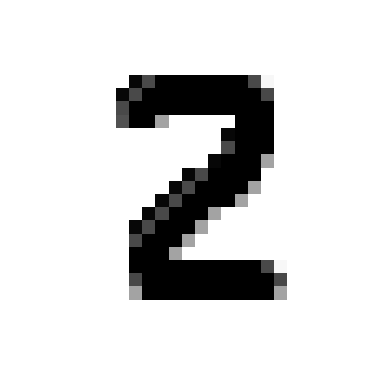

In [50]:
print("My digit 2:")
plt.imshow(255- MyNumber2, cmap='gray')
plt.axis('off')
plt.show()

My digit 8:


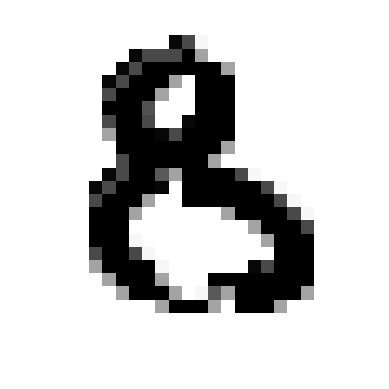

In [51]:
print("My digit 8:")
plt.imshow(255- MyNumber8, cmap='gray')
plt.axis('off')
plt.show()

Now we will teach the model to recognize a new pair of digits, and then check how the model will classify our images.

In [61]:
digit_a, digit_b = 2,8
print("First selected digit :", digit_a,"\nSecond selected digit :", digit_b)

filtered_train_X = train_X[(train_y == digit_a) | (train_y == digit_b)]
filtered_train_y = train_y[(train_y == digit_a) | (train_y == digit_b)]
filtered_test_X = test_X[(test_y == digit_a) | (test_y == digit_b)]
filtered_test_y = test_y[(test_y == digit_a) | (test_y == digit_b)]

filtered_train_y = np.where(filtered_train_y == digit_a, 0, 1)
filtered_test_y = np.where(filtered_test_y == digit_a, 0, 1)

flat_train_X = filtered_train_X.reshape(filtered_train_X.shape[0], -1)
flat_test_X = filtered_test_X.reshape(filtered_test_X.shape[0], -1)

perceptron = Perceptron(n=flat_train_X.shape[1])

perceptron.train(flat_train_X, filtered_train_y, eta=0.01, tol=0.01)

test_error_rate, test_predictions, confusion_matrix = perceptron.evaluate_test(flat_test_X, filtered_test_y)

print("Error rate on test data :" ,test_error_rate,"\nAccuracy :",1-test_error_rate,"\nConfusion matrix:\n",confusion_matrix)

First selected digit : 2 
Second selected digit : 8
Error rate on test data : 0.036390827517447655 
Accuracy : 0.9636091724825524 
Confusion matrix:
 [[960  59]
 [ 14 973]]


In [62]:
print("Correctly", digit_b, ":",confusion_matrix[0][0],"| Correctly", digit_a, ":",confusion_matrix[1][1],"| Incorrectly",digit_b,":",confusion_matrix[1][0],"| Incorrectly",digit_a,":",confusion_matrix[0][1])

Correctly 8 : 960 | Correctly 2 : 973 | Incorrectly 8 : 14 | Incorrectly 2 : 59


In [63]:
Binar_class_2 = perceptron.classify(MyNumber2.flatten())
Binar_class_8 = perceptron.classify(MyNumber8.flatten())

In [64]:
print("My digit 2 predicted class:",perceptron.decode(Binar_class_2, digit_a,digit_b),"\nMy digit 8 predicted class :",perceptron.decode(Binar_class_8, digit_a,digit_b))

My digit 2 predicted class: 2 
My digit 8 predicted class : 8


Algorithm correctly classified the numbers we entered from outside the set.